# EE-411 Fundamentals of inference and learning, EPFL 
## HW1: First passage time of a 1D Brownian particle


# Ex 1

$$ f(t)\equiv {\frac {|x_{c}-x_{0}|}{\sqrt {4\pi Dt^{3}}}}\exp \left(-{\frac {(x_{c}-x_{0})^{2}}{4Dt}}\right).$$

##### Recall: Maximum likelihood estimator


The maximum likelyhood estimator gives us the parameters of the distribution that make the observation of a given set of data $\{x_i\}$ most likely. Assuming that the observations are independent, and that the probability of observing $x$ is given by the probability distribution $P(x|\lambda)$
$$
\widehat{\lambda}_{ML}=argmax_{\lambda}\prod_i P(x_i|\lambda)=argmax_{\lambda}\left(\sum_i\log(P(x_i|\lambda))\right)
$$

There are two additional quantities that will be important for our purpuse. The first one is called the score
$$
S(x,\lambda)=\partial_\lambda L(x|\lambda),
$$
where we introduced Log-likelyihood $L(x|\lambda)=\log P(x|\lambda)$. Importantly, the average of $\mathbb{E}[S(x,\lambda)]=0$. The second one is the Fisher information, which corresponds to the variance of the score
$$
I(\lambda)=\mathbb{E}[S(x|\lambda)^2].
$$
In case of $N$ independent events we simply have
$$
I_N(\lambda)=\sum_{i=1}^N I(\lambda) = NI(\lambda).
$$

### Consider the case with $x_c - x_0=2$ and $D=1$

Then, we wish to find

$$p(y_0 | \{x_k\}, x_0)$$

Using Bayes’ theorem:

$$p(y_0 | \{x_k\}, x_0) = \frac{p(y_0 , \{x_k\}, x_0)}{p(\{x_k\}, x_0)} = \frac{p(\{x_k\} | y_0, x_0)p(y_0 | x_0)p(x_0)}{p(\{x_k\} | x_0)p(x_0)}\propto p(\{x_k\} | y_0, x_0) p(y_0)$$

where the last step comes from the fact that  $y_0 \perp x_0$, and so we have $p(y_0 | x_0) = p(y_0)$
The most intuitive prior $p(y_0)$ when we don't have additional information is the one which is uniform over a large enough segment $[y_{min}, y_{max}]$, i.e. $p(y_0) = 1/(y_{max}-y_{min})$

Even if this seems to be a good choice in general, we will show that there exist other priors that lead to a better result.
For the data likelihood $p(\{x_k\} | y_0, x_0)$ we consider that each datum $x_k$ is iid, so:
$$p(\{x_k\} | y_0, x_0) = \prod_{k=1}^N p(x_k | y_0, x_0)$$
And since the prior for $y_0$ is uniform, we finally get:
$$p(y_0 | \{x_k\}, x_0) \propto \prod_{k=1}^N p(x_k | y_0, x_0)$$

Therefore, considering a uniform prior, maximizing the posterior coincides with maximizing the Log-likelihood $L(\{x_k\} | x_0,y_0)$ 

##### We now make an experiment, by generating $N=100$ samples and plotting the dependence of the Log-likelyhood as a function of $D$. 

In [1]:
import numpy as np
np.random.seed(1) # we set the seed of the random generator

First we define the function `loglh` to compute the 
log-likelihood for a set of $N$ instances $x$, given the parameters $x_0$ and $y_0$.

In [12]:
def loglh(xc,D,x):
  logl=0
  for xi in x: logl+= np.log(xc/np.sqrt(4*np.pi*D*xi*xi*xi)) - xc*xc/(4*D*xi)
  #for xi in x: logl+= np.log(xc*xc/(2*D*np.sqrt(2*np.pi*xi*xi*xi))) - xc*xc/(4*D*xi)
  return logl

To generate the set of observations $\{x_k\}$, since we know they follow a Cauchy distribution, we can use a built-in function of the `scipy` package

In [13]:
from scipy.stats import levy

N=100
xc_true=2
D_true=1

scale=xc_true*xc_true/(2*D_true)

x=levy.rvs(scale=scale,size=N)
scale

2.0

Finally we can compute the Log-likelihood for a range of values of $y_0$ around the true value $y_0*$ and plot its behaviour

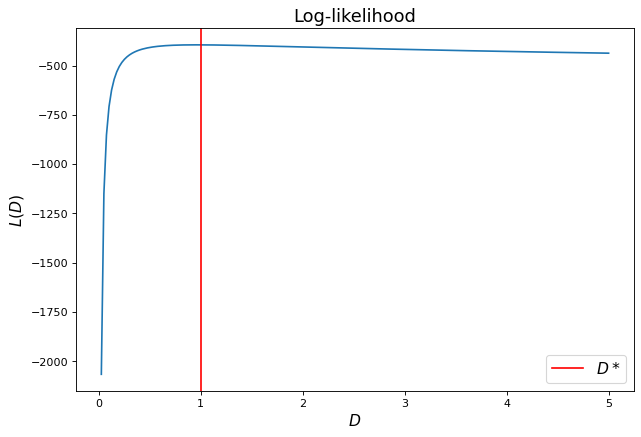

In [14]:
import matplotlib.pyplot as plt

tab_D=np.linspace(0,5,200)[1:] # we generate a table for D 
logl_D=np.array([loglh(xc_true,D,x) for D in tab_D]) # we compute the loglh for each value in the table

fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$D$', fontsize=14)
plt.ylabel('$L(D)$', fontsize=14)
plt.plot(tab_D,logl_D)
plt.axvline(D_true,color="r",label='$D*$')
plt.legend(fontsize=14);

We see that there’s a maximum near the true value, but it's not easy to see since we are working with logs.

However, if we compute the exponential we can get the shape of the posterior $p(y_0 | \{x_k\}, 20)$ (to get the true posterior – a distribution – we would need to find the normalizing factor, which is irrelevant here)

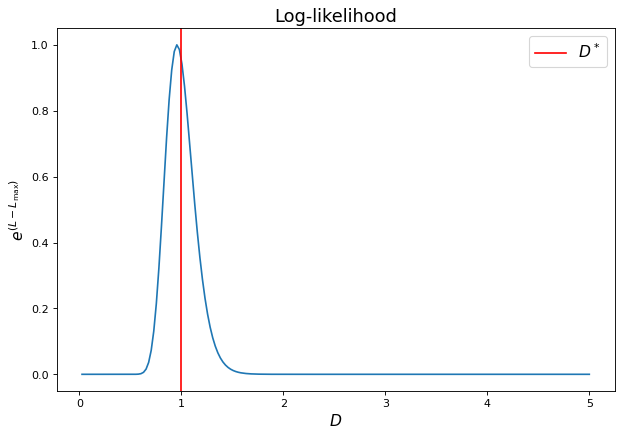

In [15]:
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$D$', fontsize=14)
plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
plt.plot(tab_D,np.exp(logl_D-max(logl_D)))
plt.axvline(D_true,color="r",label='$D^*$')
plt.legend(fontsize=14);

##### Now we compute the maximum likelihood estimator for $D$, that we call $\widehat{D}_{ML}$, and we see how it behaves when we vary the number of data in the sample $x$

A good way to compute the maximum of a function is to use a function from `scipy.optimize` called `minimize`

In [16]:
%%time
from scipy.optimize import minimize

tab_N = np.logspace(0, 4, num=40, base=10)
D_ML=[]
for N in tab_N:
  x=levy.rvs(scale=scale,size=int(N))
  D_guess = np.random.uniform(0,5) # we have to give a guess for the minimizer algorithm to start
  optimum = minimize(lambda D:-loglh(xc_true,D,x),D_guess, method='Nelder-Mead')
  D_ML.append(optimum.x)
print(D_ML)

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_15040/1012638589.py:3: RuntimeWarning: invalid value encountered in sqrt
  for xi in x: logl+= np.log(xc/np.sqrt(4*np.pi*D*xi*xi*xi)) - xc*xc/(4*D*xi)


[array([0.55231879]), array([1.36070107]), array([0.21567513]), array([0.25384567]), array([0.40595949]), array([0.98020177]), array([1.10366079]), array([1.69830775]), array([0.56764095]), array([0.30182179]), array([0.32558341]), array([1.04369768]), array([1.20650274]), array([0.48067188]), array([0.83604082]), array([0.56834265]), array([1.08509931]), array([0.96854728]), array([0.91212723]), array([0.75652188]), array([1.00400241]), array([0.97439505]), array([1.02226978]), array([0.94570289]), array([1.074752]), array([0.99186503]), array([0.98868434]), array([0.89376818]), array([1.03058627]), array([0.8649108]), array([1.05061052]), array([0.97780751]), array([1.03210019]), array([0.97983317]), array([0.97359868]), array([1.02294389]), array([1.00135718]), array([0.9715399]), array([0.99043991]), array([1.02425717])]
CPU times: user 18 s, sys: 56.3 ms, total: 18.1 s
Wall time: 18.2 s


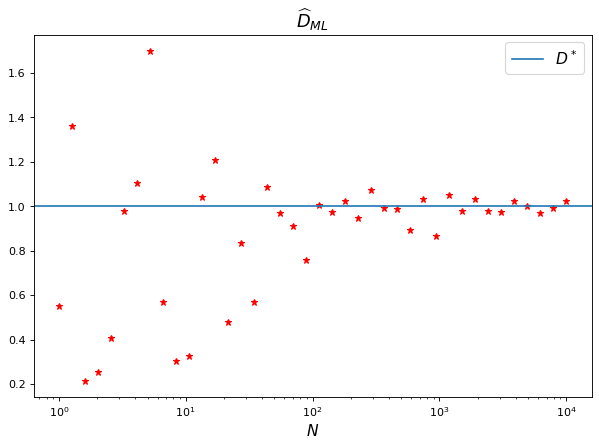

In [17]:
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('$\widehat{D}_{ML}$', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.plot(tab_N,D_ML,"*",color='r')
plt.axhline(D_true, label="$D^*$")
plt.xscale("log")
plt.legend(fontsize=14);

#### 3) Now, after having generated data for N in $[1,10^7]$, try to compute the mean $\left<x\right>$ for each sample as a function of $N$. What do you observe? What about the median?

In [18]:
tab_N = np.logspace(0, 7, num=100, base=10)
ave_x=[]
for N in tab_N:
  x=levy.rvs(scale=scale,size=int(N))
  ave_x.append(np.mean(x))

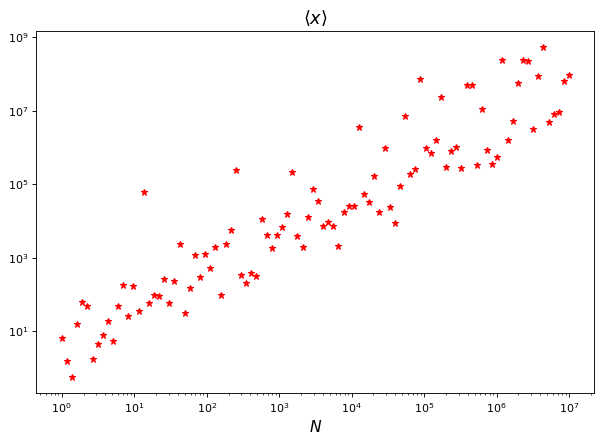

In [22]:
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title(r'$\langle x \rangle $', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.plot(tab_N,ave_x,"*",color='r')
plt.xscale("log")
plt.yscale("log")
#plt.ylim(-100,100)

The mean is not a good estimator because we cannot apply the Central Limit Theorem (CLT). The CLT only works when the data is iid (which it is) and sampled from a distribution with finite mean (which it is not). The Cauchy does not have a mean.

Anyway, the Cauchy distribution does have a median, which can be used as an estimator here:

In [23]:
tab_N = np.logspace(0, 4, num=100, base=10)
med_x=[]
for N in tab_N:
  x=levy.rvs(scale=scale,size=int(N))
  med_x.append(np.median(x))

In [31]:
from scipy.special import erfc

In [32]:
median_true=0.5*scale*(erfc(0.5))**(-2)

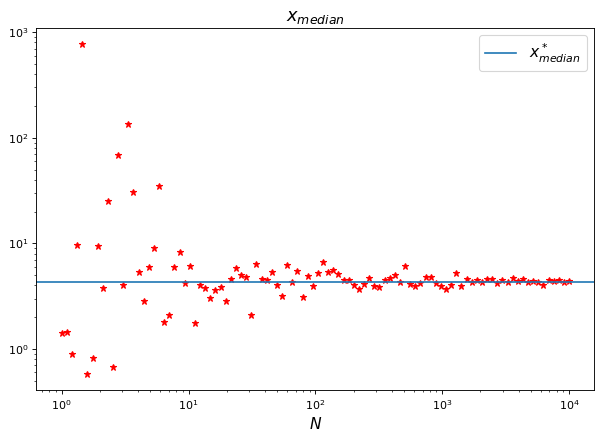

In [35]:
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('$x_{median}$', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.plot(tab_N,med_x,"*",color='r')
plt.axhline(median_true, label='$x_{median}^*$')
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=14)
#plt.ylim(-80,120)

How this estimator compares to the maximum likelihood one? To answer this question we have to compute the respective Mean Squared Errors.

### MSE: which estimator is the best?

First of all, let's recall the definition:

**Mean Squared Error**: The mean square error (MSE) is the expectation
value of the square of the difference beween the estimator and the true value of parameter.

$$MSE(\widehat{\lambda};\lambda) \equiv \mathop{\mathbb{E}_{\widehat{\lambda}}}\big[ (\widehat{\lambda} - \lambda)^2 \big]$$

#### **FISHER INFORMATION**

As we recalled earlier, for $N$ independent events we have
$$
I_N(\lambda)=\sum_{i=1}^N I(\lambda) = NI(\lambda).
$$

Therefore for our problem

$$
I_N(x_0, y_0) = N \mathbb{E}_x[S(x|x_0)^2] = -N \mathbb{E}_x\begin{bmatrix}\frac{\partial^2 L}{\partial x_0^2} & \frac{\partial^2 L}{\partial x_0\partial y_0}\\ \frac{\partial^2 L}{\partial y_0\partial x_0} & \frac{\partial^2 L}{\partial y_0^2}\end{bmatrix}
$$

And after a bit of computations, and a little help from [wolfram alpha](https://www.wolframalpha.com/calculators/integral-calculator/), one finds that if $x \in(-\infty,+\infty)$ then the Fisher information is

$$I_N(x_0, y_0) =\begin{bmatrix}\frac{N}{2y_0^2} & 0\\0 & \frac{N}{2y_0^2}\end{bmatrix} = \frac{N}{2y_0^2} \mathbb{I}_2$$

And therefore

*   $\det [I_N(x_0,y_0)] = \frac{N^2}{4y_0^4}$
*   $I_N(y_0|x_0) = \frac{N}{2y_0^2}$
*   $I_N(x_0|y_0) = \frac{N}{2y_0^2} = \text{const}$



#### **CRAMÉR-RAO BOUND**

For **unbiased estimators**, as for example the maximum likelihood one, the CRB tells us that for each parameter $\lambda_i$ we have

$$MSE(\widehat{\lambda_i}_{ML};\lambda_i) \geq \{[I_N(\mathbf{\lambda})]^{-1}\}_{ii}$$

where $I_N(\mathbf{\lambda})$ is the Fisher information.

#### **JEFFREYS PRIOR**

In general, the Jeffreys prior is given by

$$p(\mathbf{\lambda}) \propto \sqrt{\det[I_N(\mathbf{\lambda})]}$$

#### Consider the case in which $x_0=20$, and we know its value, and we want to estimate $y_0$

In this case the Cramér-Rao bound tells us:

$$MSE(\widehat{y_0}_{ML};y_0) \geq \frac{2y_0^2}{N}$$

While the Jeffreys prior, normalized, is $p(y_0) = \frac{1}{y_0}$ and thus the posterior 

$$p(y_0 | \{x_k\}, x_0) \propto p(\{x_k\} | y_0, x_0) p(y_0) \propto \frac{1}{y_0}\prod_{i=1}^{N}  \frac{1}{\pi} \frac{y_0}{(x_i-x_0)^2 + y_0^2}$$

##### Now let's compute the MSE on the likelihood estimator and on the one found with Jeffreys prior, and compare the two with the Cramér-Rao bound

Firstly, we define the function to compute the posterior with Jeffreys prior

In [36]:
def jeffpost(xc,D,x):
  jp= - np.log(D) #prior
  for xi in x: jp+= np.log(xc/np.sqrt(4*np.pi*D*xi*xi*xi)) - xc*xc/(4*D*xi)
  return jp

Since we are going to use it a lot of times, we define a new function `minimizer_y0` to compute the estimators given a function to minimize  

In [37]:
def minimizer_D(func,D):
  D_est=np.zeros(N_rep)
  for ir in range(N_rep):
    x=levy.rvs(scale=scale,size=int(N))
    D_est[ir] = minimize(lambda y:-func(xc_true,y,x),np.random.uniform(0,30), method='Nelder-Mead').x
  return D_est;

To estimate the $MSE$, i.e. to compute the expected value over $\widehat{\lambda}$, we need to repeat the estimation $N_{rep}$ times. We will do this for $N_{est} = 15$ values of $y_0$ in $(0,1]$, starting with $N=10$ and $N_{rep} = 500$

In [48]:
N_est=9
tab_D=np.linspace(0,2,N_est+1)[1:]
N = 10
N_rep = 500

In [49]:
%%time

D_ML= np.array([ minimizer_D(loglh,D) for D in tab_D])
D_J= np.array([ minimizer_D(jeffpost,D) for D in tab_D])

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_15040/1012638589.py:3: RuntimeWarning: invalid value encountered in sqrt
  for xi in x: logl+= np.log(xc/np.sqrt(4*np.pi*D*xi*xi*xi)) - xc*xc/(4*D*xi)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_15040/1012638589.py:3: RuntimeWarning: divide by zero encountered in true_divide
  for xi in x: logl+= np.log(xc/np.sqrt(4*np.pi*D*xi*xi*xi)) - xc*xc/(4*D*xi)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_15040/1012638589.py:3: RuntimeWarning: invalid value encountered in subtract
  for xi in x: logl+= np.log(xc/np.sqrt(4*np.pi*D*xi*xi*xi)) - xc*xc/(4*D*xi)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_15040/557085676.py:2: RuntimeWarning: invalid value encountered in log
  jp= - np.log(D) #prior
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_15040/557085676.py:2: RuntimeWarning: divide by zero encountered in log
  jp= - np.log(D) #prior


CPU times: user 51.5 s, sys: 211 ms, total: 51.8 s
Wall time: 51.8 s


Now that we have computed $N_{rep}$ estimates for each value of $y_0$ with both methods, we can estimate the $MSE$ and we can use **bootstrap** to give a confidence interval on our estimations

First we define the function `MSE_est`
that, given the array of $N_{rep}$ estimates of $y_0$, returns the estimate of the $MSE$ and its C.I.

In [50]:
from numpy import percentile
from numpy.random import choice

def MSE_est(D_est,D):
  N_boot=100
  MSE = (D_est - np.full(N_rep, D))**2 #avoid for loops!
  MSE_mean = MSE.mean()
  MSE_boot = choice(MSE,(N_boot,N_rep))
  MSE_boot_mean = MSE_boot.mean(axis=1)
  CI_min = percentile(MSE_boot_mean, [2.5,97.5])[0]
  CI_max = percentile(MSE_boot_mean, [2.5,97.5])[1]

  return MSE_mean, CI_min, CI_max

And now we can compute our estimates for each $y_0$

In [51]:
MSE_ML_10 = np.zeros(N_est)
CI_min_ML_10 = np.zeros(N_est)
CI_max_ML_10 = np.zeros(N_est)
MSE_J_10 = np.zeros(N_est)
CI_min_J_10 = np.zeros(N_est)
CI_max_J_10 = np.zeros(N_est)

for j,D in enumerate(tab_D):
  MSE, CI_min, CI_max = MSE_est(D_ML[j], D)
  MSE_ML_10[j] = MSE
  CI_min_ML_10[j] = CI_min
  CI_max_ML_10[j] = CI_max
  MSE, CI_min, CI_max = MSE_est(D_J[j], D)
  MSE_J_10[j] = MSE
  CI_min_J_10[j] = CI_min
  CI_max_J_10[j] = CI_max

And compare them to the Cramér-Rao bound

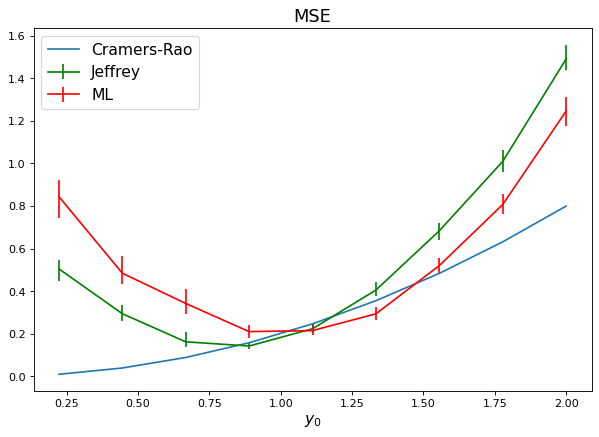

In [52]:
fig = plt.figure(figsize=(9, 6), dpi=80)

plt.title('MSE', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.errorbar(tab_D,MSE_J_10,yerr=[MSE_J_10-CI_min_J_10, CI_max_J_10-MSE_J_10],marker="",color='g', label='Jeffrey')
plt.errorbar(tab_D,MSE_ML_10,yerr=[MSE_ML_10-CI_min_ML_10, CI_max_ML_10-MSE_ML_10],marker="",color='r', label='ML')
plt.plot(tab_D, 2*tab_D*tab_D/N, label='Cramers-Rao')
plt.legend(fontsize=14)

#### 4) Now do the same for $N=3$ and $N=50$ and plot all in a single graph, to see what happens when we vary $N$

In [53]:
%%time
N = 3
N_rep = 1000

D_ML= np.array([ minimizer_D(loglh,D) for D in tab_D])
D_J= np.array([ minimizer_D(jeffpost,D) for D in tab_D])

MSE_ML_3 = np.zeros(N_est)
CI_min_ML_3 = np.zeros(N_est)
CI_max_ML_3 = np.zeros(N_est)
MSE_J_3 = np.zeros(N_est)
CI_min_J_3 = np.zeros(N_est)
CI_max_J_3 = np.zeros(N_est)

for j,D in enumerate(tab_D):
  MSE, CI_min, CI_max = MSE_est(D_ML[j], D)
  MSE_ML_3[j] = MSE
  CI_min_ML_3[j] = CI_min
  CI_max_ML_3[j] = CI_max
  MSE, CI_min, CI_max = MSE_est(D_J[j], D)
  MSE_J_3[j] = MSE
  CI_min_J_3[j] = CI_min
  CI_max_J_3[j] = CI_max

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_15040/1012638589.py:3: RuntimeWarning: invalid value encountered in sqrt
  for xi in x: logl+= np.log(xc/np.sqrt(4*np.pi*D*xi*xi*xi)) - xc*xc/(4*D*xi)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_15040/1012638589.py:3: RuntimeWarning: divide by zero encountered in true_divide
  for xi in x: logl+= np.log(xc/np.sqrt(4*np.pi*D*xi*xi*xi)) - xc*xc/(4*D*xi)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_15040/1012638589.py:3: RuntimeWarning: invalid value encountered in subtract
  for xi in x: logl+= np.log(xc/np.sqrt(4*np.pi*D*xi*xi*xi)) - xc*xc/(4*D*xi)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_15040/557085676.py:2: RuntimeWarning: invalid value encountered in log
  jp= - np.log(D) #prior
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_15040/557085676.py:2: RuntimeWarning: divide by zero encountered in log
  jp= - np.log(D) #prior


CPU times: user 42.7 s, sys: 156 ms, total: 42.9 s
Wall time: 42.8 s


In [54]:
%%time
N = 50
N_rep = 200

D_ML= np.array([ minimizer_D(loglh,D) for D in tab_D])
D_J= np.array([ minimizer_D(jeffpost,D) for D in tab_D])

MSE_ML_50 = np.zeros(N_est)
CI_min_ML_50 = np.zeros(N_est)
CI_max_ML_50 = np.zeros(N_est)
MSE_J_50 = np.zeros(N_est)
CI_min_J_50 = np.zeros(N_est)
CI_max_J_50 = np.zeros(N_est)

for j,D in enumerate(tab_D):
  MSE, CI_min, CI_max = MSE_est(D_ML[j], D)
  MSE_ML_50[j] = MSE
  CI_min_ML_50[j] = CI_min
  CI_max_ML_50[j] = CI_max
  MSE, CI_min, CI_max = MSE_est(D_J[j], D)
  MSE_J_50[j] = MSE
  CI_min_J_50[j] = CI_min
  CI_max_J_50[j] = CI_max

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_15040/1012638589.py:3: RuntimeWarning: invalid value encountered in sqrt
  for xi in x: logl+= np.log(xc/np.sqrt(4*np.pi*D*xi*xi*xi)) - xc*xc/(4*D*xi)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_15040/1012638589.py:3: RuntimeWarning: divide by zero encountered in true_divide
  for xi in x: logl+= np.log(xc/np.sqrt(4*np.pi*D*xi*xi*xi)) - xc*xc/(4*D*xi)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_15040/1012638589.py:3: RuntimeWarning: invalid value encountered in subtract
  for xi in x: logl+= np.log(xc/np.sqrt(4*np.pi*D*xi*xi*xi)) - xc*xc/(4*D*xi)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_15040/557085676.py:2: RuntimeWarning: invalid value encountered in log
  jp= - np.log(D) #prior
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_15040/557085676.py:2: RuntimeWarning: divide by zero encountered in log
  jp= - np.log(D) #prior


CPU times: user 1min 30s, sys: 368 ms, total: 1min 31s
Wall time: 1min 31s


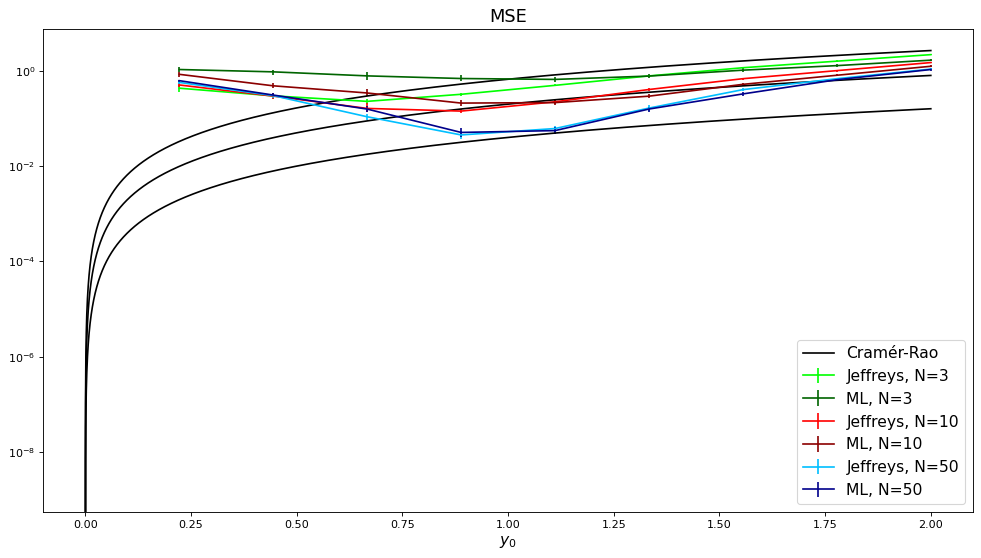

In [56]:
fig = plt.figure(figsize=(15, 8), dpi=80)
plt.title('MSE', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
C_tab = np.linspace(0,2,10000)

plt.errorbar(tab_D,MSE_J_3,yerr=[MSE_J_3-CI_min_J_3, CI_max_J_3-MSE_J_3],marker="",color='lime', label='Jeffreys, N=3')
plt.errorbar(tab_D,MSE_ML_3,yerr=[MSE_ML_3-CI_min_ML_3, CI_max_ML_3-MSE_ML_3],marker="",color='darkgreen', label='ML, N=3')
plt.plot(C_tab, 2*C_tab*C_tab/3,color='k', label='Cramér-Rao')
plt.errorbar(tab_D,MSE_J_10,yerr=[MSE_J_10-CI_min_J_10, CI_max_J_10-MSE_J_10],marker="",color='r', label='Jeffreys, N=10')
plt.errorbar(tab_D,MSE_ML_10,yerr=[MSE_ML_10-CI_min_ML_10, CI_max_ML_10-MSE_ML_10],marker="",color='darkred', label='ML, N=10')
plt.plot(C_tab, 2*C_tab*C_tab/10,color='k')
plt.errorbar(tab_D,MSE_J_50,yerr=[MSE_J_50-CI_min_J_50, CI_max_J_50-MSE_J_50],marker="",color='deepskyblue', label='Jeffreys, N=50')
plt.errorbar(tab_D,MSE_ML_50,yerr=[MSE_ML_50-CI_min_ML_50, CI_max_ML_50-MSE_ML_50],marker="",color='darkblue', label='ML, N=50')
plt.plot(C_tab, 2*C_tab*C_tab/50,color='k')
plt.legend(fontsize=14)
plt.yscale('log')
#plt.xlim([0,1])
#plt.ylim([10e-5,10e2])